In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; } </style>"))
import numpy as np
np.set_printoptions(linewidth=160)
from scipy.sparse import dia_matrix
from scipy.sparse.linalg import spsolve
from scipy.sparse.linalg import bicgstab
from scipy.sparse.linalg import bicg
from scipy.sparse.linalg import cg
from scipy.sparse.linalg import cgs
from scipy.sparse.linalg import gmres
from scipy.sparse.linalg import lgmres
from scipy.sparse.linalg import minres
from scipy.sparse.linalg import qmr
from scipy.sparse.linalg import gcrotmk
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [17]:
nx=50*4
ny=50*4
x=np.linspace(0,1,nx)
y=np.linspace(0,1,ny)
vx,vy=np.meshgrid(x,y)

In [18]:
dx=np.zeros((nx*ny,5))
dy=np.zeros((nx*ny,5))
cent=2
for i in range(nx):
    for j in range(ny):
        if (i>0) and (i<(nx-1)):
            dx[j*nx+i,cent-1]=-1
            dx[j*nx+i,cent]=1
        elif (i==0):
            dx[j*nx+i,cent]=-1.
            dx[j*nx+i,cent+1]=1.
        else:
            dx[j*nx+i,cent-1]=-1.
            dx[j*nx+i,cent]=1.
        if (j>0) and (j<(ny-1)):
            dy[j*nx+i,cent-2]=-1
            dy[j*nx+i,cent]=1
        elif (j==0):
            dy[j*nx+i,cent]=-1.
            dy[j*nx+i,cent+2]=1.
        else:
            dy[j*nx+i,cent-2]=-1.
            dy[j*nx+i,cent]=1.

In [19]:
l=np.zeros((nx*ny,5))
cent=2
for i in range(nx):
    for j in range(ny):
        if (i>0):
            l[j*nx+i,cent-1]+=1
            l[j*nx+i,cent]-=1
        if (i<(nx-1)):
            l[j*nx+i,cent+1]+=1
            l[j*nx+i,cent]-=1
        if (j>0):
            l[j*nx+i,cent-2]+=1
            l[j*nx+i,cent]-=1
        if (j<(ny-1)):
            l[j*nx+i,cent+2]+=1
            l[j*nx+i,cent]-=1


In [20]:
bnd=(vy==0) | (vx==0)
bndx=(vy==0)
bndy=bnd & (vy!=0)
freenode=np.argwhere((bnd!=True).flatten()).flatten()
bndxnode=np.argwhere((bndx.flatten())).flatten()
bndynode=np.argwhere((bndy.flatten())).flatten()
bndnode=np.argwhere((bnd.flatten())).flatten()
d=dy*ny+dx*nx
d[bndnode,:]=0
d[bndnode,2]=1
u=np.zeros((nx*ny,1))
bx=vx.reshape((nx*ny,1))[bndxnode]
by=vy.reshape((nx*ny,1))[bndynode]
u[bndxnode]=bx*bx
u[bndynode]=1/2*by*by
f=vx.reshape(nx*ny,1).copy()
f[bndnode]=u[bndnode]

In [6]:
A=dia_matrix(((d).T,np.array([nx,1,0,-1,-nx])),shape=(nx*ny,nx*ny)).transpose()

In [7]:
sol,info=gcrotmk(A,f,tol=1e-12,maxiter=100)

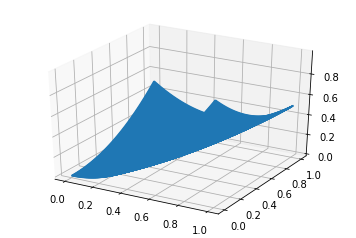

In [8]:
%matplotlib inline
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_wireframe(vx.flatten().reshape(nx,ny), vy.flatten().reshape(nx,ny), sol.reshape(nx,ny),rstride=1,cstride=1)

In [263]:
%%time
sol,info=gcrotmk(A,f,tol=1e-12,maxiter=100)
print(info)
print(A.dot(sol))

0
[0.00000000e+00 2.52518876e-05 1.01007550e-04 ... 9.89949749e-01 9.94974874e-01 1.00000000e+00]
CPU times: user 4.67 s, sys: 4.04 s, total: 8.7 s
Wall time: 2.26 s


In [262]:
%%time
sol,info=gmres(A,f,tol=1e-12,maxiter=500)
print(info)
print(A.dot(sol))

0
[0.00000000e+00 2.52518876e-05 1.01007550e-04 ... 9.89949749e-01 9.94974874e-01 1.00000000e+00]
CPU times: user 7.94 s, sys: 7.13 s, total: 15.1 s
Wall time: 3.91 s


In [16]:
L=dia_matrix(((l).T,np.array([nx,1,0,-1,-nx])),shape=(nx*ny,nx*ny)).transpose()
L.toarray()

array([[-2.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1., -3.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1., -3.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1., -3.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1., -2.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0., -3.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  1., -4.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  1., -4.,  1.,  0.,  0.,